In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/My Drive/...

In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 799.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 42.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=1ef9a42d3823d7d21dbf39286ecf13eb10602732cc9e5ca2a7a0bfb46428d39c
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize # токенизатор
import pymorphy2 as pm # морфологический анализатор
import matplotlib.pyplot as plt # визуализация

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
morph = pm.MorphAnalyzer(lang='ru') # создаём морфологический анализатор

In [ ]:
# функция для токенизации текста
def tokenize(txt):
  txt = word_tokenize(txt) # список токенов
  txt = [word for word in txt if word.isalpha()] # берём только те токены, которые являются словами
  txt = ' '.join(txt) # соединяем финальные токены обратно в строку

  return txt # возвращаем строку

In [ ]:
# функция для лемматизации текста
def lemmatize(txt):
  txt = word_tokenize(txt) # токенизируем текст
  txt = [morph.parse(word)[0].normal_form for word in txt] # лемматизируем текст
  txt = ' '.join(txt)

  return txt

Определим структуру данных (таблица pandas с тремя колонками: id, text, topic, то есть тематика текста - наша целевая метка). Загрузим данные из файлов в нашу таблицу.

(Потренируюсь немного с модулем os: как получить содержимое директории?)

In [ ]:
import os
for topic in os.listdir(r'/content/drive/MyDrive/corpus/'):
  print(os.listdir(r'/content/drive/MyDrive/corpus/' + topic))

['science_26.02-04.03_0.txt', 'science_26.02-04.03_1.txt', 'science_26.02-04.03_2.txt', 'science_26.02-04.03_3.txt', 'science_26.02-04.03_6.txt', 'science_26.02-04.03_5.txt', 'science_26.02-04.03_10.txt', 'science_26.02-04.03_8.txt', 'science_26.02-04.03_9.txt', 'science_26.02-04.03_13.txt', 'science_26.02-04.03_12.txt', 'science_26.02-04.03_11.txt', 'science_26.02-04.03_14.txt', 'science_26.02-04.03_15.txt', 'science_26.02-04.03_16.txt', 'science_26.02-04.03_17.txt', 'science_26.02-04.03_19.txt', 'science_26.02-04.03_20.txt', 'science_26.02-04.03_18.txt', 'science_26.02-04.03_21.txt', 'science_26.02-04.03_23.txt', 'science_26.02-04.03_24.txt', 'science_26.02-04.03_27.txt', 'science_26.02-04.03_26.txt', 'science_26.02-04.03_25.txt', 'science_26.02-04.03_30.txt', 'science_26.02-04.03_29.txt', 'science_26.02-04.03_31.txt', 'science_26.02-04.03_33.txt', 'science_26.02-04.03_32.txt', 'science_26.02-04.03_34.txt', 'science_26.02-04.03_35.txt', 'science_26.02-04.03_37.txt', 'science_26.02-04

In [ ]:
import os
import pandas as pd

df = pd.DataFrame(columns=['text', 'topic']) # пустая таблица со столбцами text и topic (id в начале каждой строки добавляется автоматически)
i = 0
topics = ['culture', 'hi-tech', 'politics', 'science']
for topic in topics: # перебираем папки-категории
  for file in os.listdir('/content/drive/MyDrive/corpus/' + topic): # перебираем файлы в каждой папке
    txt = "" # хотим получить текст в виде строки без символов переноса на новую строку '\n'
    i += 1 # индекс обучающего примера (текст + метка) в таблице pandas
    filename = '/content/drive/MyDrive/corpus/' + topic + '/' + file
    with open(filename, 'r', encoding='utf-8') as f:
      try: # отлавливаем всякие исключения типа unicode-decode-error
        for line in f: # читаем файл построчно
          txt += str(line).strip('\n') # обрезаем символы '\n' и добавляем в строку
        df.loc[i] = [tokenize(txt), topic] # добавляем строку в таблицу
      except:
        continue

df.tail() # посмотрим на "хвост" нашей таблицы

,text,topic
1053,Испытан анализатор ДНК который может найти жиз...,science
1054,Своя правда люди чаще отрицают факты сказанные...,science
1055,У людей с мигренью возрастает риск развития бо...,science
1056,использует пилу чтобы разрезать жертву изнутри...,science
1057,Травма головы может спровоцировать развитие де...,science


In [ ]:
# случайным образом перемешаем строки в датасете
# поскольку frac=1, мы берём все строки из исходной таблицы (frac - это доля)
# reset_index(drop=True) - это мы сбрасываем исходные индексы в датафрейме
df_random = df.sample(frac=1).reset_index(drop=True)
df_random.head()

,text,topic
0,Вред от постоянного использования чистящих сре...,science
1,Бог не играет в кости антропологи изучили эвол...,science
2,В Angry Birds теперь можно сыграть на деньги Л...,hi-tech
3,Сибирские археологи Великий шёлковый путь людя...,science
4,Одна из делегаций попыталась сорвать форум по ...,politics


Визуализируем наши данные в виде столбчатой диаграммы

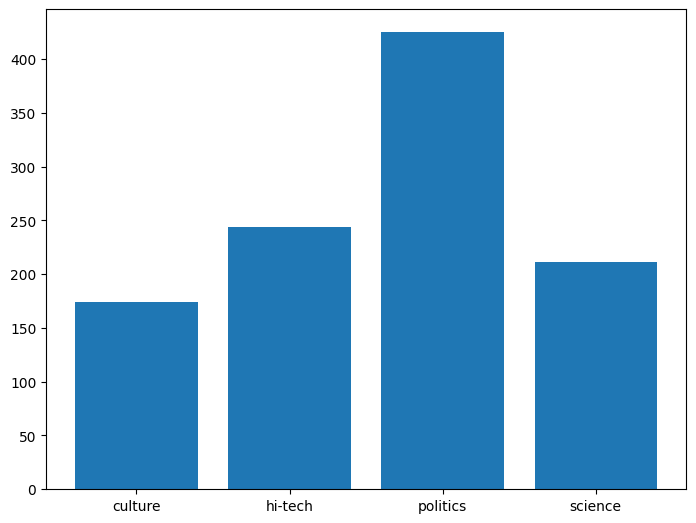

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1]) # задаём прямоугольник, в котором будет расположен наш график

targets = ["culture", "hi-tech", "politics", "science"] # таргеты - названия столбцов

# посчитаем частоты классов
cult_num = df_random[df_random["topic"] == "culture"]["topic"].count()
tech_num = df_random[df_random["topic"] == "hi-tech"]["topic"].count()
pol_num = df_random[df_random["topic"] == "politics"]["topic"].count()
sci_num = df_random[df_random["topic"] == "science"]["topic"].count()

nums = [cult_num, tech_num, pol_num, sci_num] # значения по оси OY

ax.bar(targets, nums) # bar = barchart - столбчатая диаграмма
plt.show()

Видим, что текстов про политику в нашей выборке больше всего.

## SVM

Support Vector Machine - метод опорных векторов.

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.svm import LinearSVC # классификатор
from sklearn.pipeline import Pipeline # пайплайн - последовательность этапов работы
# у нас: векторизация, нормализация, классификация
from sklearn import metrics # метрики для оценки качества классификации
from sklearn.feature_extraction.text import CountVectorizer # векторизатор
from sklearn.feature_extraction.text import TfidfTransformer # преобразует вектора слов с учётом значений TF-IDF

from sklearn.model_selection import train_test_split # для разделения выборки на обучающую и тестовую

In [ ]:
x = df_random["text"] # тексты
y = df_random["topic"] # целевые метки

# поделим данные на обучающую и тестовую выборки в соотношении 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [ ]:
"""
Создаём наш пайплайн:
1. Векторизуем тексты с помощью CountVectorizer
2. Преобразуем полученные вектора с учётом TF-IDF и с использованием TfidfTransformer
3. Обучим наш классификатор - LinearSVC
Важно! Для создания объекта класса Pipeline нужно передать в качестве аргумента список кортежей!
"""
text_clf = Pipeline([
    ('count', CountVectorizer()),
     ('tfid', TfidfTransformer()),
    ('clf', LinearSVC())
])

In [ ]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('count', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('clf', LinearSVC())])

In [ ]:
# предскажем целевые метки на тестовой выборке
predicted = text_clf.predict(X_test)

In [ ]:
# оценим качество предсказаний
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

     culture       1.00      0.91      0.95        46
     hi-tech       1.00      1.00      1.00        46
    politics       0.94      1.00      0.97        81
     science       0.97      0.95      0.96        38

    accuracy                           0.97       211
   macro avg       0.98      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211



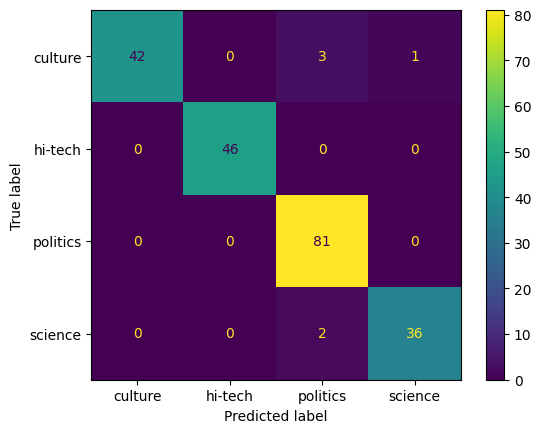

In [ ]:
# построим confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
# отобразим нашу матрицу
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["culture", "hi-tech", "politics", "science"])
cm_display.plot()
plt.show()

Интерпретация: сколько текстов, относящихся к тематике "culture" (к примеру) были действительно отнесены классификатором к классу "culture".

## Decision Tree

Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier # новый классификатор - дерево решений
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.model_selection import train_test_split

In [ ]:
x = df_random.text
y = df_random.topic

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8, random_state=42)

In [ ]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', DecisionTreeClassifier())
])

In [ ]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])

In [ ]:
predicted = text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

     culture       0.76      0.76      0.76        46
     hi-tech       1.00      1.00      1.00        46
    politics       0.86      0.89      0.87        81
     science       0.94      0.87      0.90        38

    accuracy                           0.88       211
   macro avg       0.89      0.88      0.88       211
weighted avg       0.88      0.88      0.88       211



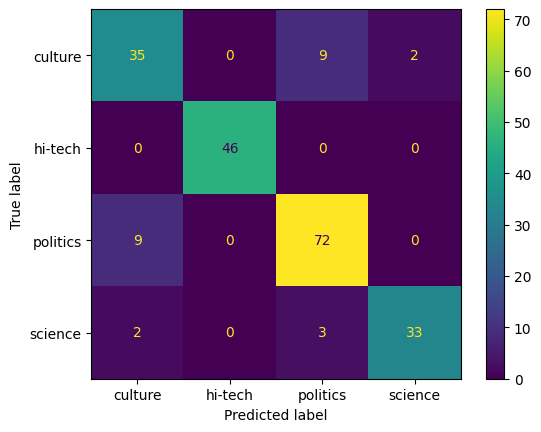

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["culture", "hi-tech", "politics", "science"])

cm_display.plot()
plt.show()

## Random Forest

Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split

In [ ]:
x = df_random.text
y = df_random.topic

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=100)),
                     ])

In [ ]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

In [ ]:
predicted = text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

     culture       1.00      0.54      0.70        46
     hi-tech       1.00      1.00      1.00        46
    politics       0.77      1.00      0.87        81
     science       0.94      0.87      0.90        38

    accuracy                           0.88       211
   macro avg       0.93      0.85      0.87       211
weighted avg       0.90      0.88      0.87       211



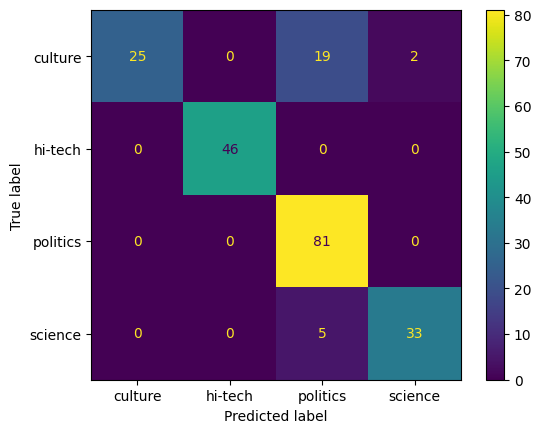

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["culture", "hi-tech", "politics", "science"])

cm_display.plot()
plt.show()

## Naive Bayes

Наивный Байесовский

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split


x = df_random.text
y = df_random.topic

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    random_state=42)

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

     culture       0.00      0.00      0.00        46
     hi-tech       1.00      0.78      0.88        46
    politics       0.56      1.00      0.72        81
     science       1.00      0.82      0.90        38

    accuracy                           0.70       211
   macro avg       0.64      0.65      0.62       211
weighted avg       0.61      0.70      0.63       211



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


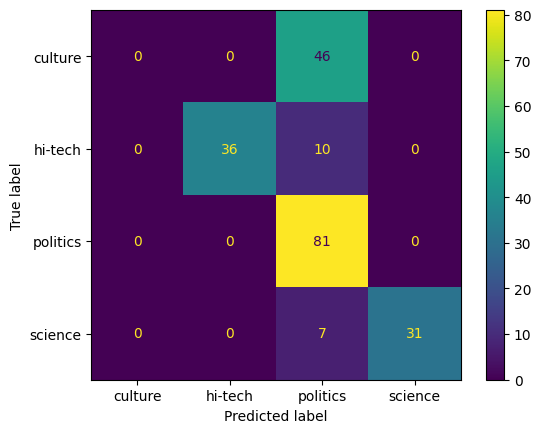

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["culture", "hi-tech", "politics", "science"])

cm_display.plot()
plt.show()

Ну Наивный Байес вообще так себе работает, если честно

## KNN

Метод K ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split


x = df_random.text
y = df_random.topic

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    random_state=42)

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier()),
                     ])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

     culture       1.00      0.76      0.86        46
     hi-tech       1.00      0.89      0.94        46
    politics       0.81      1.00      0.90        81
     science       1.00      0.92      0.96        38

    accuracy                           0.91       211
   macro avg       0.95      0.89      0.92       211
weighted avg       0.93      0.91      0.91       211



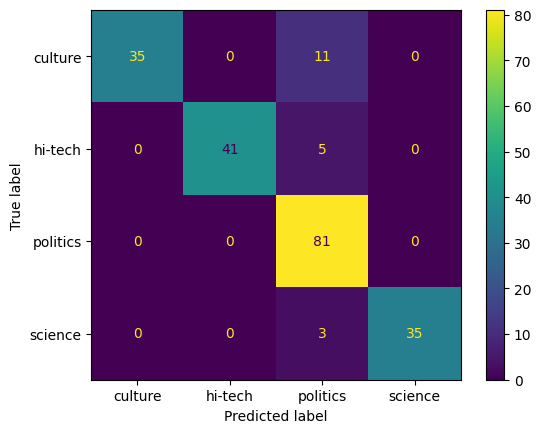

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["culture", "hi-tech", "politics", "science"])

cm_display.plot()
plt.show()

## ROCCIO

In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split


x = df_random.text
y = df_random.topic

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    random_state=42)

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', NearestCentroid()),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

     culture       0.94      0.91      0.92        33
     hi-tech       1.00      0.96      0.98        52
    politics       0.98      1.00      0.99        90
     science       0.89      0.92      0.90        36

    accuracy                           0.96       211
   macro avg       0.95      0.95      0.95       211
weighted avg       0.96      0.96      0.96       211



## Logistic Regression

Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split


x = df_random.text
y = df_random.topic

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.8,
                                                    random_state=42)

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression()),
                     ])

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

     culture       1.00      0.74      0.85        46
     hi-tech       1.00      1.00      1.00        46
    politics       0.86      1.00      0.93        81
     science       0.92      0.89      0.91        38

    accuracy                           0.92       211
   macro avg       0.95      0.91      0.92       211
weighted avg       0.93      0.92      0.92       211



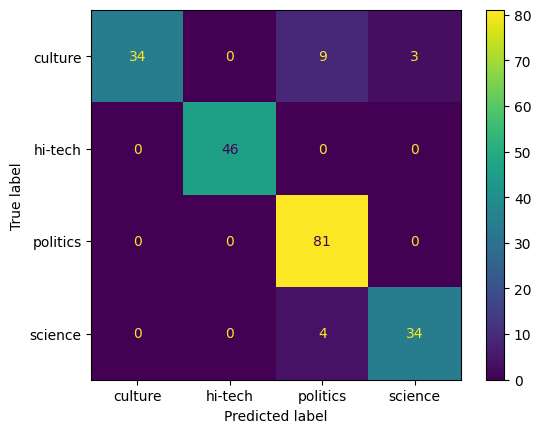

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["culture", "hi-tech", "politics", "science"])

cm_display.plot()
plt.show()

## Теперь то же самое, но с лемматизированными текстами